In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("Dark2")

results = pd.read_parquet("./sampling_scaling_rtt.gzip")
results["timing_model"] = results["timing_model"].astype(
    pd.CategoricalDtype(["fitted-naive", "empirical-low", "empirical-high", "theoretical-low", "theoretical-high"], ordered=True)
)
results["sampling_scheme"] = results["sampling_scheme"].astype(
    pd.CategoricalDtype(
        ['greedy',
         'ideal',
         'adaptive-empirical',
         'adaptive-theoretical',
         'adaptive-fitted-naive',
         'periodic-1.00',
         'periodic-2.00',
         'periodic-3.00',
         'hold-1.00',
         'hold-2.00',
         'hold-3.00'], ordered=True
)
)

results

,rtt,step,previous_ttf,execution_time,step_duration,ttf,wait_time,samples,cumulative_duration,cumulative_samples,repetition,timing_model,sampling_scheme
0,3.333333,1,3.333333,8.931693,13.333333,4.401640,1.068307,3,13.333333,3,3,empirical-high,adaptive-empirical
1,3.333333,2,4.401640,7.557500,14.200964,6.643463,3.310130,3,27.534297,6,3,empirical-high,adaptive-empirical
2,3.333333,3,6.643463,2.730432,7.787084,5.056652,1.723318,1,35.321381,7,3,empirical-high,adaptive-empirical
3,3.333333,4,5.056652,5.471368,12.024730,6.553362,3.220029,2,47.346111,9,3,empirical-high,adaptive-empirical
4,3.333333,5,6.553362,6.684169,12.340353,5.656184,2.322851,2,59.686464,11,3,empirical-high,adaptive-empirical
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484995,0.555556,96,1.124469,15.875380,18.555556,2.680176,2.124620,6,677.333333,208,5,theoretical-low,periodic-3.00
1484996,0.555556,97,2.680176,4.997054,6.555556,1.558501,1.002946,2,683.888889,210,5,theoretical-low,periodic-3.00
1484997,0.555556,98,1.558501,2.500765,3.555556,1.054790,0.499235,1,687.444444,211,5,theoretical-low,periodic-3.00
1484998,0.555556,99,1.054790,11.728466,12.555556,0.827090,0.271534,4,700.000000,215,5,theoretical-low,periodic-3.00


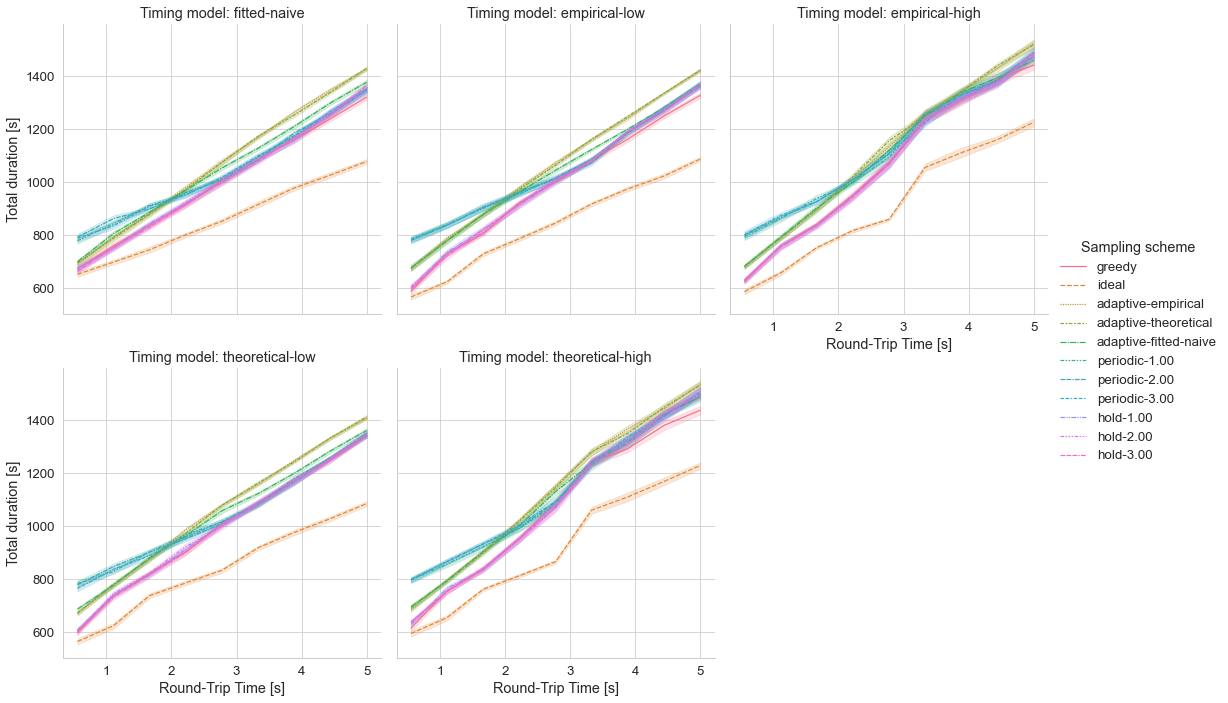

In [2]:
fg = sns.relplot(
    kind="line",
    data=results[results["step"] == results["step"].max()],
    x="rtt",
    y="cumulative_duration",
    hue="sampling_scheme",
    col="timing_model",
    col_wrap=3,
    style="sampling_scheme",
)
fg.set_axis_labels("Round-Trip Time [s]", "Total duration [s]")
fg.legend.set_title("Sampling scheme")
fg.set_titles(col_template="Timing model: {col_name}")
plt.show()

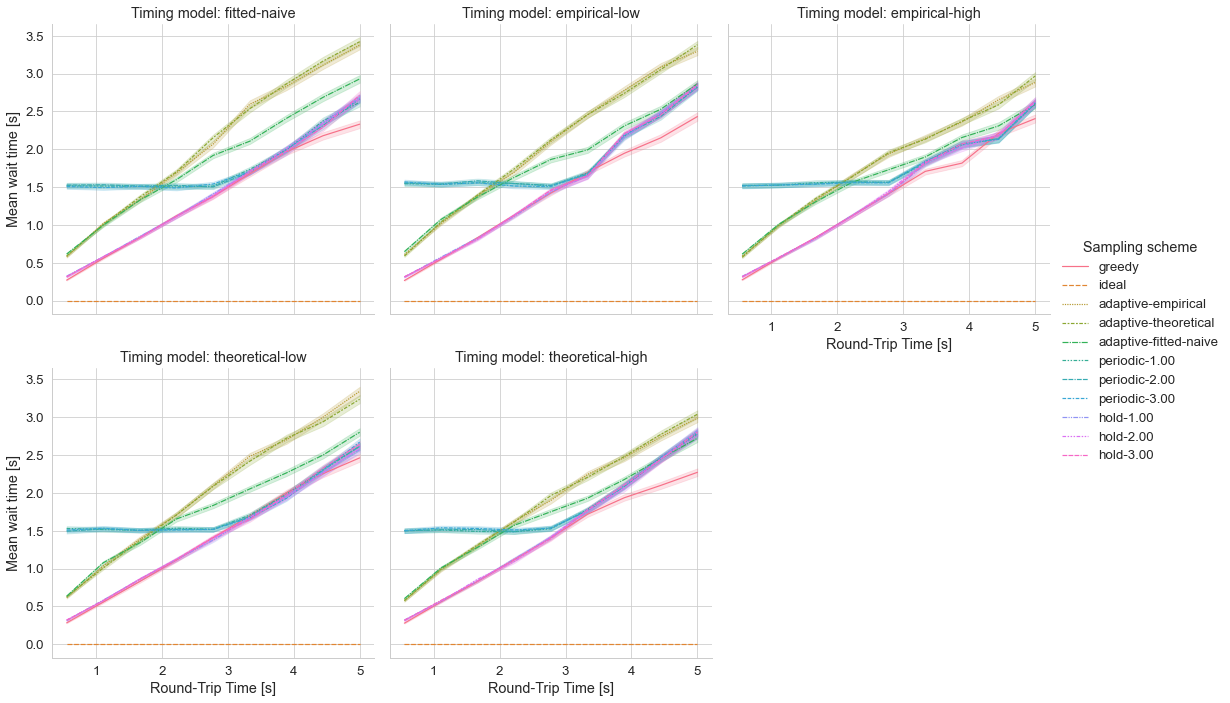

In [3]:
fg = sns.relplot(
    kind="line",
    data=results,
    x="rtt",
    y="wait_time",
    hue="sampling_scheme",
    col="timing_model",
    col_wrap=3,
    style="sampling_scheme",
)
fg.set_axis_labels("Round-Trip Time [s]", "Mean wait time [s]")
fg.legend.set_title("Sampling scheme")
fg.set_titles(col_template="Timing model: {col_name}")
plt.show()

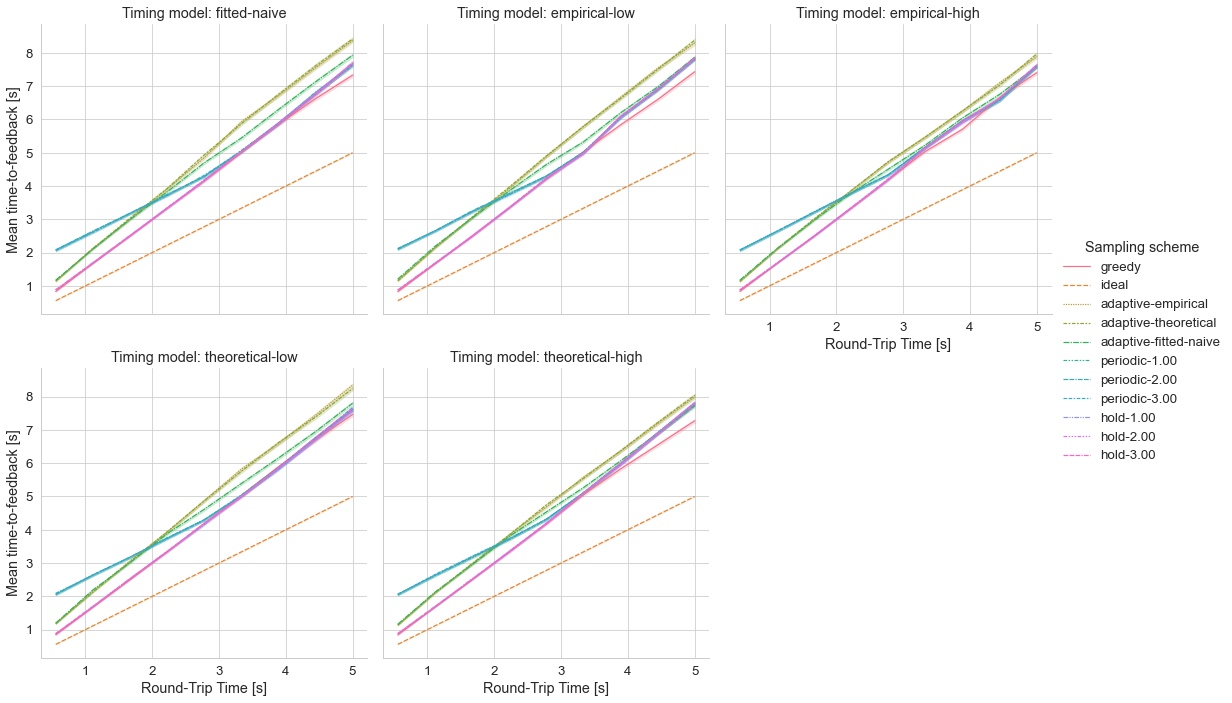

In [4]:
fg = sns.relplot(
    kind="line",
    data=results,
    x="rtt",
    y="ttf",
    hue="sampling_scheme",
    col="timing_model",
    col_wrap=3,
    style="sampling_scheme",
)
fg.set_axis_labels("Round-Trip Time [s]", "Mean time-to-feedback [s]")
fg.legend.set_title("Sampling scheme")
fg.set_titles(col_template="Timing model: {col_name}")
plt.show()

In [ ]:
fg = sns.relplot(
    kind="line",
    data=results,
    x="rtt",
    y="samples",
    hue="sampling_scheme",
    col="timing_model",
    col_wrap=3,
    style="sampling_scheme",
)
fg.set_axis_labels("Round-Trip Time [s]", "Mean number of samples per step")
fg.legend.set_title("Sampling scheme")
fg.set_titles(col_template="Timing model: {col_name}")
plt.show()